In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rc("font", size=14)

In [25]:
db = pd.read_csv('../dataset_voitures_sans_entete.csv')

In [26]:
#Les entête 
headers = ['symboling','normalized_losses','make','fueltype','aspiration','num_of_doors','body_style','drive_wheels',
           'engine_location','wheelbase','length','width','height','curb_weight','engine_type','num_of_cylinders',
           'engine_size','fuelsystem','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg',
           'highwaympg','price']
db = pd.read_csv('../dataset_voitures_sans_entete.csv', header=None, names=headers)
db.head(5)

,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheelbase,...,engine_size,fuelsystem,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
db.describe()

,symboling,wheelbase,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h1>Nettoyage</h1>

In [28]:
db.replace('?', np.nan, inplace=True)
print(db.isnull().sum())
print(db.shape)
db.head()

symboling             0
normalized_losses    41
make                  0
fueltype              0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheelbase             0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuelsystem            0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highwaympg            0
price                 4
dtype: int64
(205, 26)


,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheelbase,...,engine_size,fuelsystem,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highwaympg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [29]:
db.dropna(inplace=True)
print(db.isnull().sum())
print(db.shape)

symboling            0
normalized_losses    0
make                 0
fueltype             0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheelbase            0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuelsystem           0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highwaympg           0
price                0
dtype: int64
(159, 26)


In [30]:
db['price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 159 entries, 3 to 204
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
159 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [31]:
db['price'] = db['price'].astype('float')
db['price'].head()

3     13950.0
4     17450.0
6     17710.0
8     23875.0
10    16430.0
Name: price, dtype: float64

<h1>Visualisation</h1>

<AxesSubplot:>

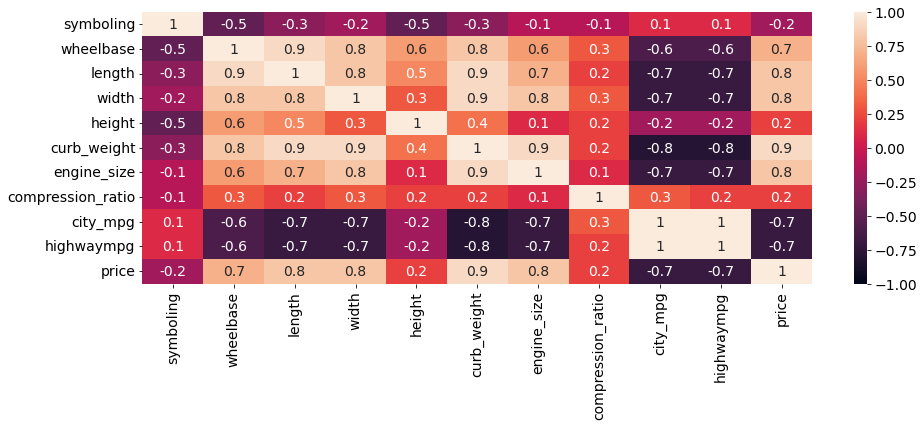

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(data=db.corr().round(1), annot=True, vmin=-1)

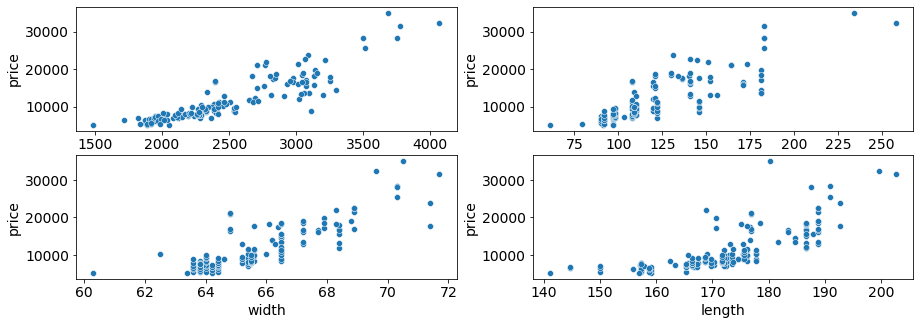

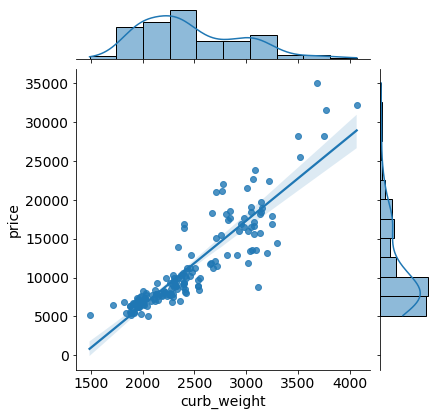

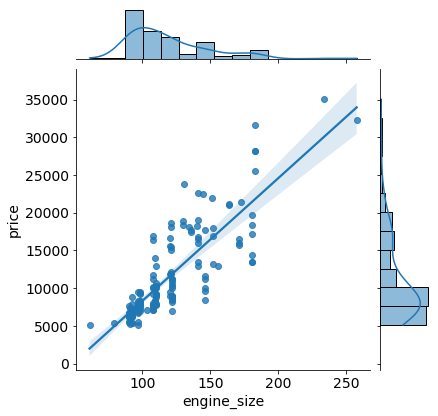

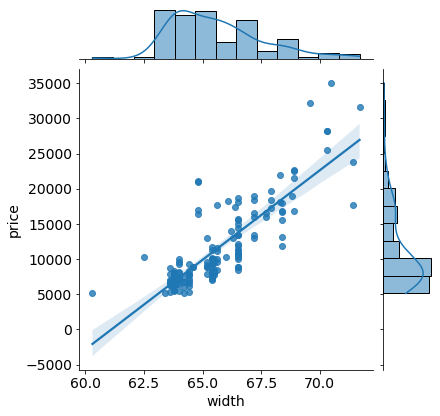

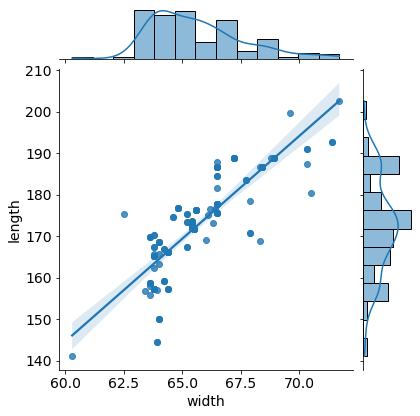

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.scatterplot(data=db,x='curb_weight', y='price')
plt.subplot(2,2,2)
sns.scatterplot(data=db,x='engine_size', y='price')
plt.subplot(2,2,3)
sns.scatterplot(data=db,x='width', y='price')
plt.subplot(2,2,4)
sns.scatterplot(data=db,x='length', y='price')

sns.jointplot(data=db,x='curb_weight', y='price', kind='reg')

sns.jointplot(data=db,x='engine_size', y='price',kind="reg")

sns.jointplot(data=db,x='width', y='price',kind="reg")

sns.jointplot(data=db,x='width', y='length',kind="reg")

<h1>Etude de Regression</br></h1>Ici nous avont identifié plusieurs variables independantes pouvant expliquer le prix

In [34]:
#Utilisation d'un algorithme des moindes carrées (ols) pour regression multiple des

import statsmodels.api as sm
from statsmodels.formula.api import ols

reg = ols('price ~ engine_size + curb_weight + width + length',db).fit()
print (reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           3.29e-58
Time:                        09:10:24   Log-Likelihood:                -1464.1
No. Observations:                 159   AIC:                             2938.
Df Residuals:                     154   BIC:                             2954.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.965e+04   1.17e+04     -5.117      

<h1>Creation du Model</br></h1>

In [35]:
#on utilisera seulement 3 variables explicatives
X=pd.DataFrame(np.c_[db['engine_size'], db['curb_weight'], db['width'], db['width']], columns = ['engine_size','curb_weight','width','length'])
Y=db['price']

#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# 80% pour l'entrainement 
# 20% pour le test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(db.shape)

(127, 4)
(32, 4)
(127,)
(32,)
(159, 26)


In [36]:
model = LinearRegression()
model.fit(X_train,Y_train)
print(model.predict(X_train)[0])

17312.546859242182


In [37]:
# Evaluation du training set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 2400.2010475611564
le score R2 est 0.8187816990648855


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 2816.5861971496865
le score R2 est 0.8205442876238463


<h1>Test de prediction</h1>

In [38]:
e = 110.0
c = 2236.0
w = 65.2
prediction = pd.DataFrame(np.c_[e,c,w], columns = ['engine_size','curb_weight','width'])
prediction
model.predict(prediction)[0]

c:\Users\Carl Elias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- length

  warnings.warn(message, FutureWarning)


ValueError: X has 3 features, but LinearRegression is expecting 4 features as input.

In [ ]:
e = 109
c = 2237
w = 66.2
prediction = pd.DataFrame(np.c_[e,c,w], columns = ['engine_size','curb_weight','width'])
prediction
model.predict(prediction)[0]

9740.89741563901

<h1>Visualisation de prediction</h1>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<font size="10"><b><u>Deploiement du modèle</u></b></font></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1- Sauvegarde du modèle</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2- Chargement du modèle </br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3- Verification des paramètres du modèle chargé</br>

In [ ]:
#On va sauvegarder le modèle
import joblib
joblib.dump(value = model, filename='modele_de_prediction.pkl')

#chargement du modèle
model_charger = joblib.load(filename='modele_de_prediction.pkl')


#Verification des paramètres du model 
print("pente (a) : ", model_charger.coef_[0])
print("Ordonné à l'origine (b) : ",model_charger.intercept_)
#Coefficient de determination du modèle
model.score(X_train,Y_train).round(2) #---------> Coefficient de determination

pente (a) :  18.344341542057876
Ordonné à l'origine (b) :  -40247.82013354728


0.82

<h1>Programme</h1>